<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/lab01_part3_svm_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

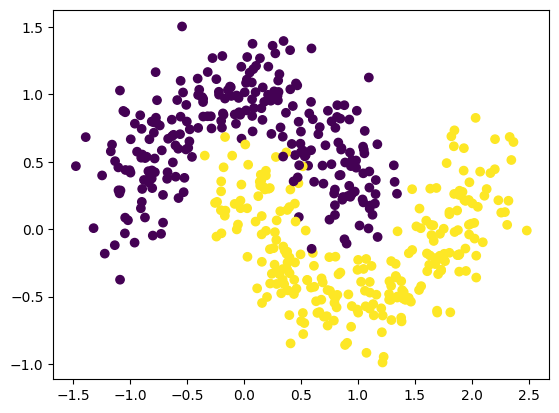

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C=1) # add some params
svm = SVC(kernel='linear', C=1) # here too

### YOUR CODE HERE
def n(clf, params):
    name = str(clf).split('(')[0]
    p_name = ''
    for param in params:
        try:
            param_value = str(clf).split(param + '=')[1].split(',')[0]
            p_name += param + '=' + param_value + ', '
        except:
            continue
    if len(p_name):
        name += '({}'.format(p_name[:-2])
    return name


def plot_decisions(X, y, estimators, layout=(1, 2),
                         param_keys=['kernel', 'degree', 'penalty', 'C'],
                         metric={'name': 'ROC AUC', 'func': roc_auc_score}):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    rows, cols = layout
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5.5 * rows))
    axes = np.array(axes).reshape(-1)

    for idx, (estimator, ax) in enumerate(zip(estimators.reshape(-1), axes)):
        label = n(estimator, param_keys)
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        score = metric['func'](y_test, y_pred)
        plot_decision_regions(X, y, clf=estimator, ax=ax, legend=2)
        ax.set_title(f"{label}\n{metric['name']}: {score:.2f}", fontsize=12)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.tight_layout()
    plt.suptitle("Decision Boundaries of Different Estimators", fontsize=16, y=1.02)
    plt.show()

In [ ]:
lr = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=42)
svm = SVC(kernel='linear', C=1, random_state=42)

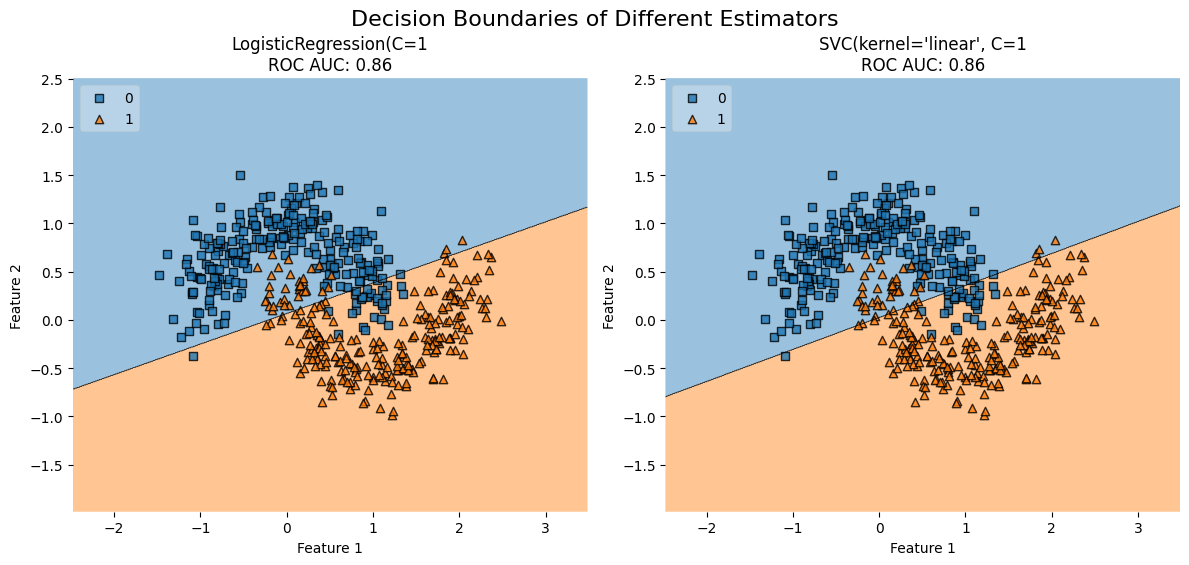

In [ ]:
plot_decisions(moons_points, moons_labels, np.array([lr, svm]))

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

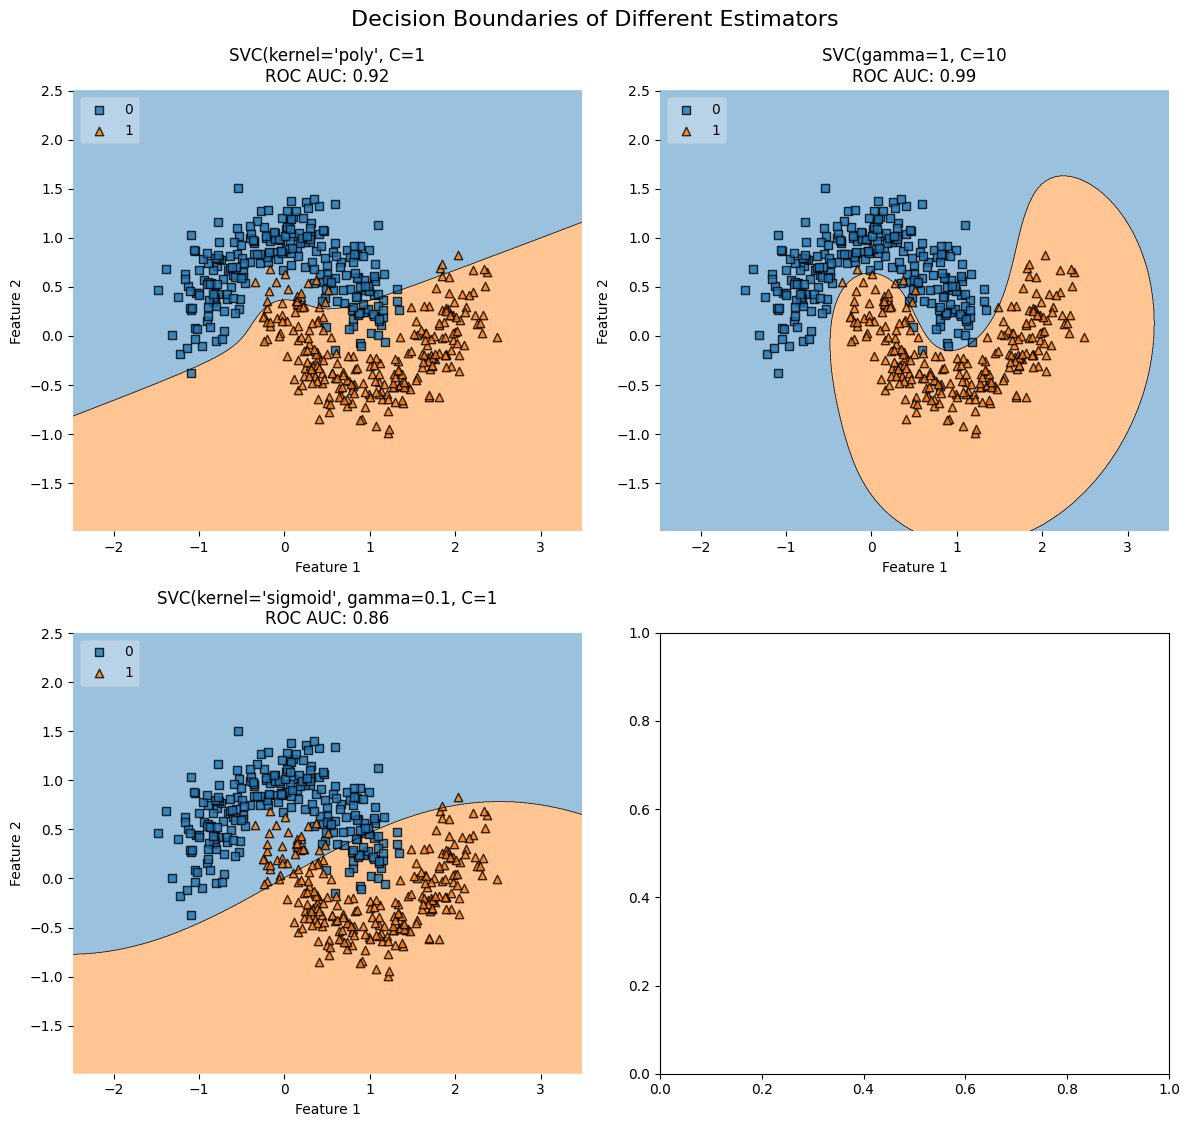

In [ ]:
### YOUR CODE HERE
poly_svm = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
rbf_svm = SVC(kernel='rbf', C=10, gamma=1, random_state=42)
sigmoid_svm = SVC(kernel='sigmoid', C=1, gamma=0.1, random_state=42)
plot_decisions(moons_points, moons_labels, np.array([poly_svm, rbf_svm, sigmoid_svm]),
               layout=(2, 2),
               param_keys=['kernel', 'degree', 'gamma', 'C'])

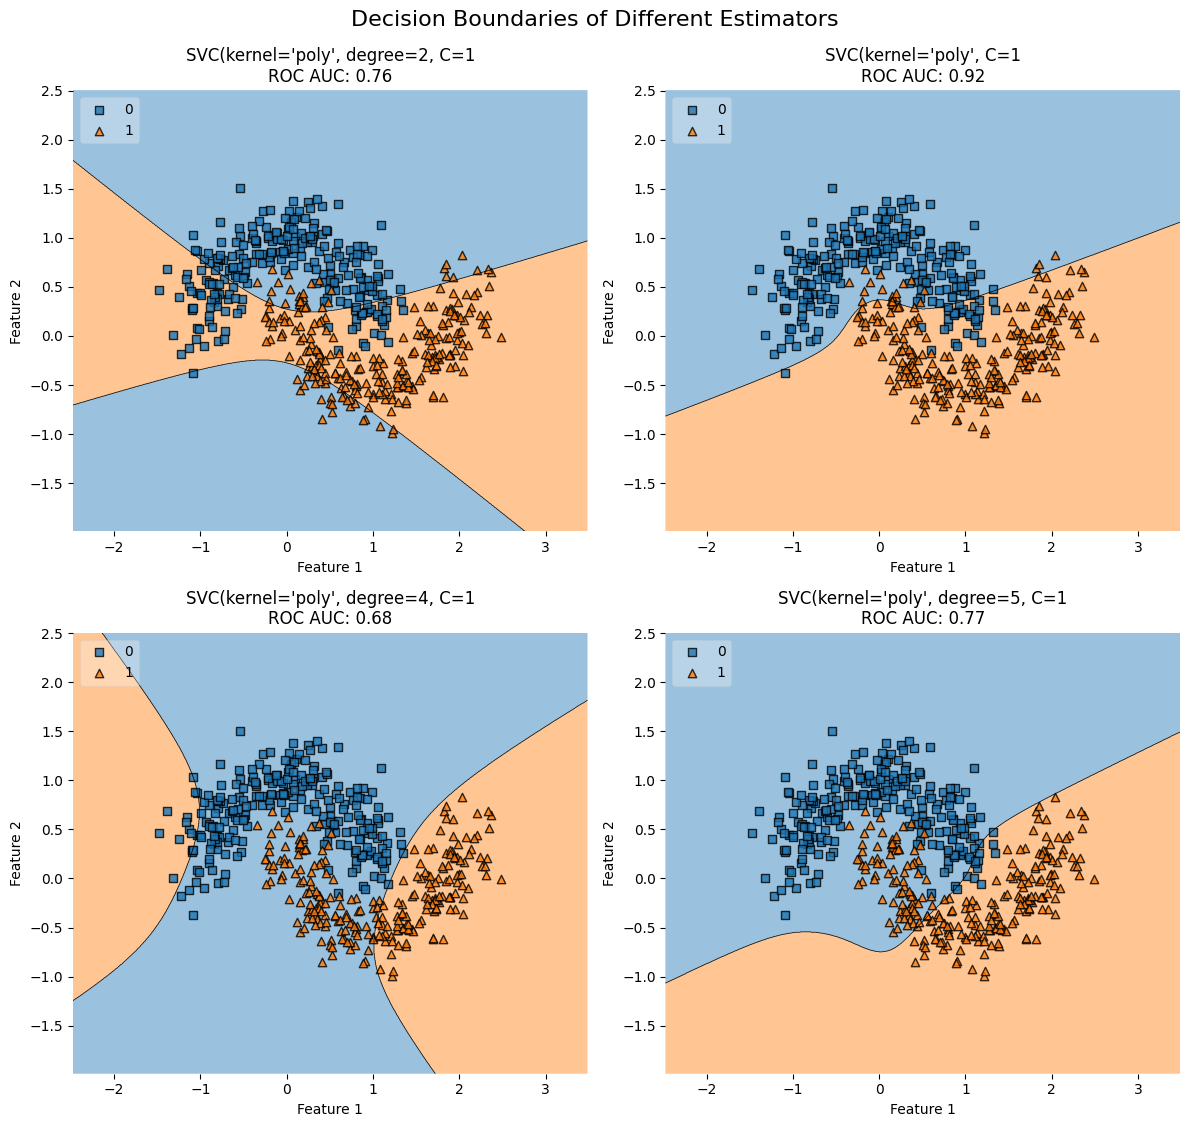

In [ ]:
poly2_svm = SVC(kernel='poly', degree=2, C=1, gamma='scale', random_state=42)
poly3_svm = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
poly4_svm = SVC(kernel='poly', degree=4, C=1, gamma='scale', random_state=42)
poly5_svm = SVC(kernel='poly', degree=5, C=1, gamma='scale', random_state=42)
plot_decisions(moons_points, moons_labels, np.array([poly2_svm, poly3_svm, poly4_svm, poly5_svm]),
               layout=(2, 2),
               param_keys=['kernel', 'degree', 'gamma', 'C'])


The RBF kernel (gamma=1, C=10) performs the best with an ROC AUC of 0.99
The polynomial kernel achieves a good ROC AUC of 0.92
The sigmoid kernel shows the lowest performance with an ROC AUC of 0.86

For RBF kernel the decision boundary is highly curved and perfectly adapts to the moon shapes  producing the highest accuracy.

Polynomial kernels show varying boundaries based on degree  with degree 3 achieving the best balance between flexibility and generalization, while sigmoid kernel creates a wave-like boundary that doesn't fit the data as effectively

Based on the results, degree 3 is clearly the optimal choice for the polynomial kernel. This is because:

It has the highest performance (ROC AUC of 0.92) among all polynomial degrees tested

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

LR degree=2 roc-auc: 0.8583
LR degree=3) roc auc: 0.9634


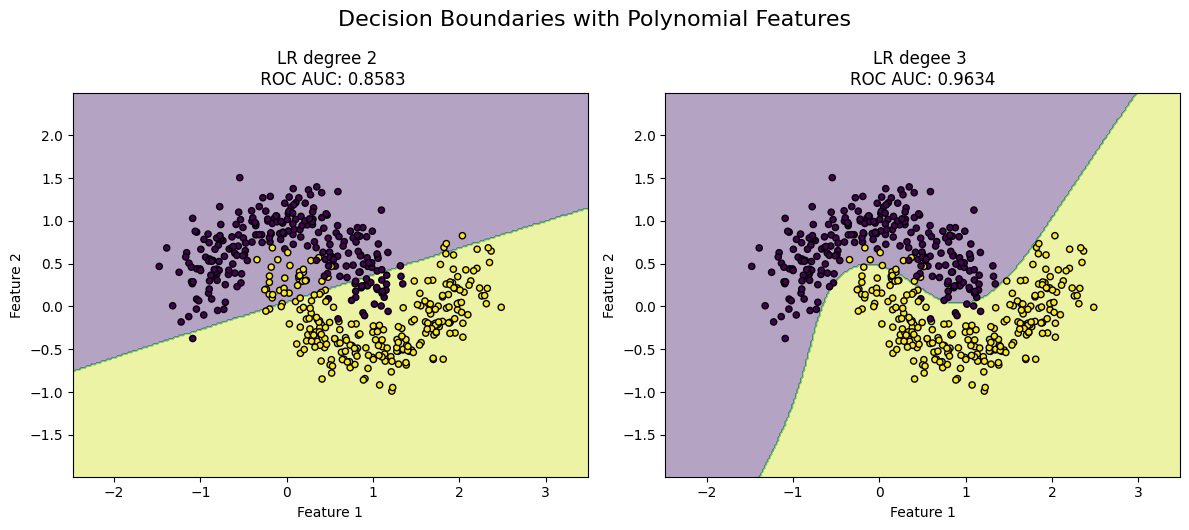

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
moons_poly2 = poly_features2.fit_transform(moons_points)
moons_poly3 = poly_features3.fit_transform(moons_points)
lr_poly2 = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=42)
lr_poly3 = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.15, random_state=42)
X_train_poly2 = poly_features2.transform(X_train)
X_test_poly2 = poly_features2.transform(X_test)
X_train_poly3 = poly_features3.transform(X_train)
X_test_poly3 = poly_features3.transform(X_test)

lr_poly2.fit(X_train_poly2, y_train)
lr_poly3.fit(X_train_poly3, y_train)
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)

print(f"LR degree=2 roc-auc: {roc_auc_score(y_test, y_pred_poly2):.4f}")
print(f"LR degree=3) roc auc: {roc_auc_score(y_test, y_pred_poly3):.4f}")


def plot_poly_decision_regions(X, y, polynomial_transformer, classifier, ax=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    poly_grid = polynomial_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = classifier.predict(poly_grid)
    Z = Z.reshape(xx.shape)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

    return ax
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_poly_decision_regions(moons_points, moons_labels, poly_features2, lr_poly2, ax=axes[0])
axes[0].set_title(f"LR degree 2 \n ROC AUC: {roc_auc_score(y_test, y_pred_poly2):.4f}", fontsize=12)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

plot_poly_decision_regions(moons_points, moons_labels, poly_features3, lr_poly3, ax=axes[1])
axes[1].set_title(f"LR degee 3 \nROC AUC: {roc_auc_score(y_test, y_pred_poly3):.4f}", fontsize=12)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.suptitle("Decision Boundaries with Polynomial Features", fontsize=16, y=1.05)
plt.show()

For quality, LR with degree 3 polynomial features achieves an ROC AUC of 0.9634  which is comparable to RBF SVM = 0.99 and better than polynomial SVM = 0.92
So optimal degree of PolynomialFeatures is 3

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

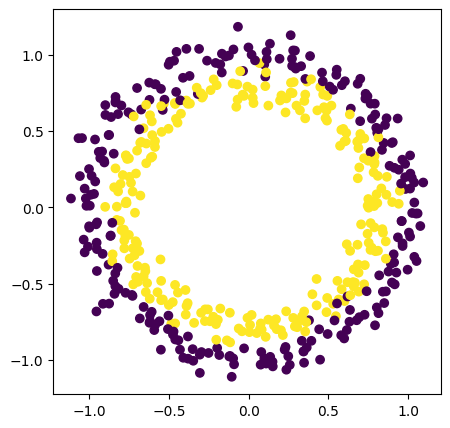

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

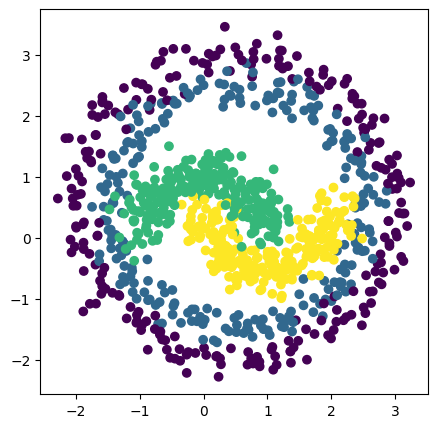

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
### YOUR CODE HERE
rbf_svm_circles = SVC(kernel='rbf', C=10, gamma=1, random_state=42)
poly_svm_circles = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)

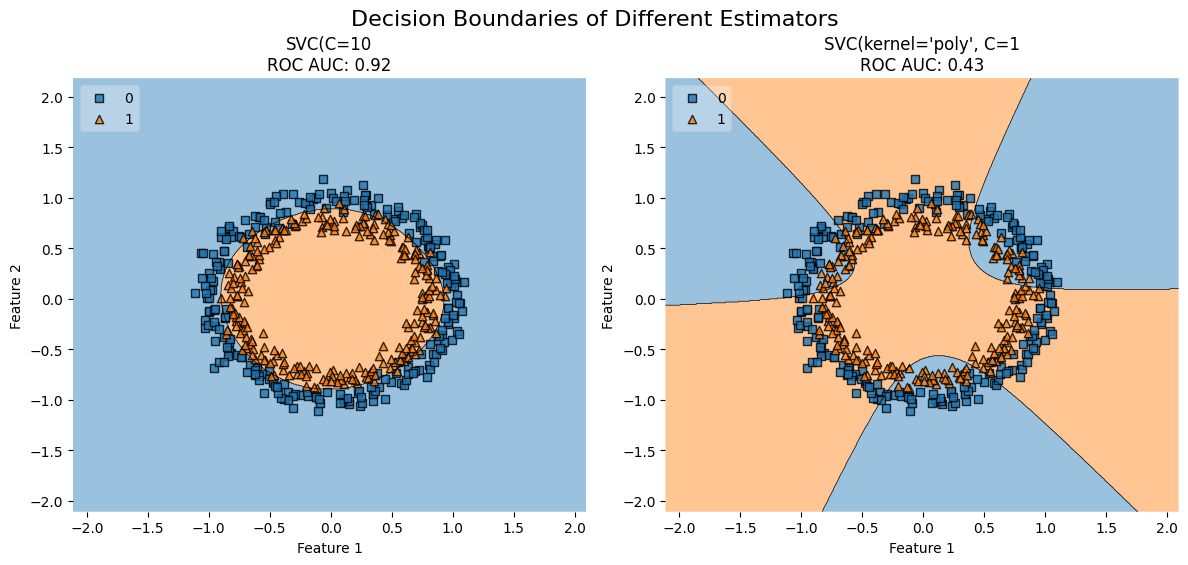

In [ ]:
plot_decisions(circles_points, circles_labels, np.array([rbf_svm_circles, poly_svm_circles]))

# Ans
RBF SVM (C=10) performs excellently with ROC AUC of 0.92 while Polynomial SVM performs poorly (ROC AUC: 0.43)

In [ ]:
rbf_svm_combined = SVC(kernel='rbf', C=10, gamma=1, random_state=42)
poly_svm_combined = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
rbf_svm_combined = SVC(kernel='rbf', C=10, gamma=1, random_state=42)
poly_features_combined = PolynomialFeatures(degree=5, include_bias=False)
points_poly = poly_features_combined.fit_transform(points)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.15, random_state=42)
X_train_poly = poly_features_combined.transform(X_train)
X_test_poly = poly_features_combined.transform(X_test)
lr_poly_combined = LogisticRegression(penalty='l2', C=0.1, max_iter=2000, multi_class='ovr', random_state=42)
lr_poly_combined.fit(X_train_poly, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=2000, multi_class='ovr', random_state=42)

In [ ]:
y_pred_poly_combined = lr_poly_combined.predict(X_test_poly)
print(f"LR with Polynomial Features (degree=5) Accuracy: {accuracy_score(y_test, y_pred_poly_combined):.4f}")

LR with Polynomial Features (degree=5) Accuracy: 0.8467


/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


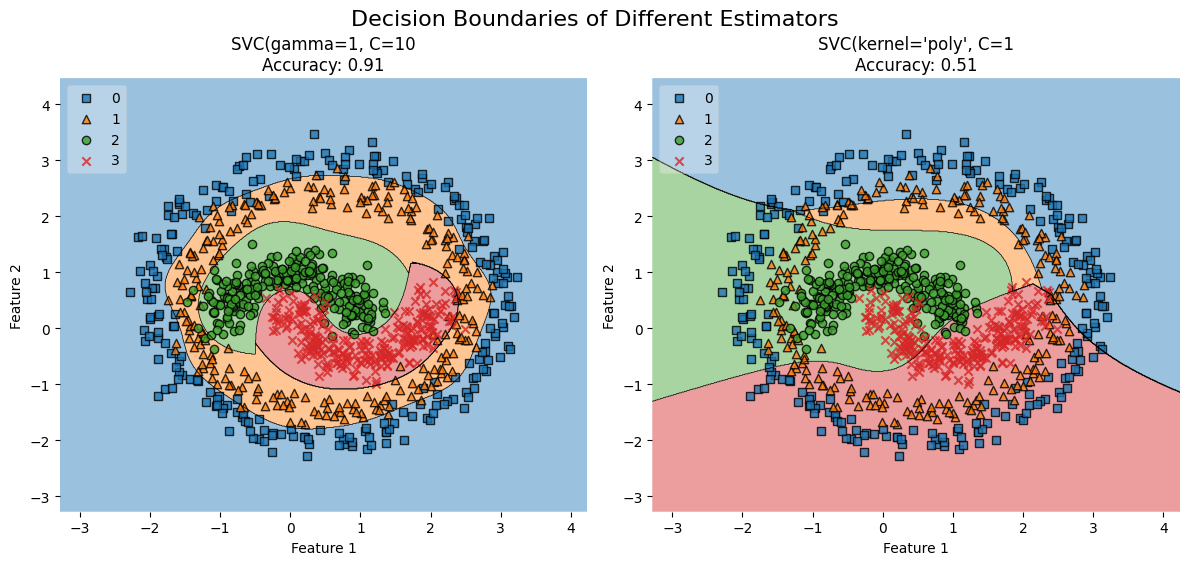

In [ ]:
plot_decisions(points, labels, np.array([rbf_svm_combined, poly_svm_combined]),
               layout=(1, 2),
               param_keys=['kernel', 'degree', 'gamma', 'C'],
               metric={'name': 'Accuracy', 'func': accuracy_score})

<Figure size 800x800 with 0 Axes>

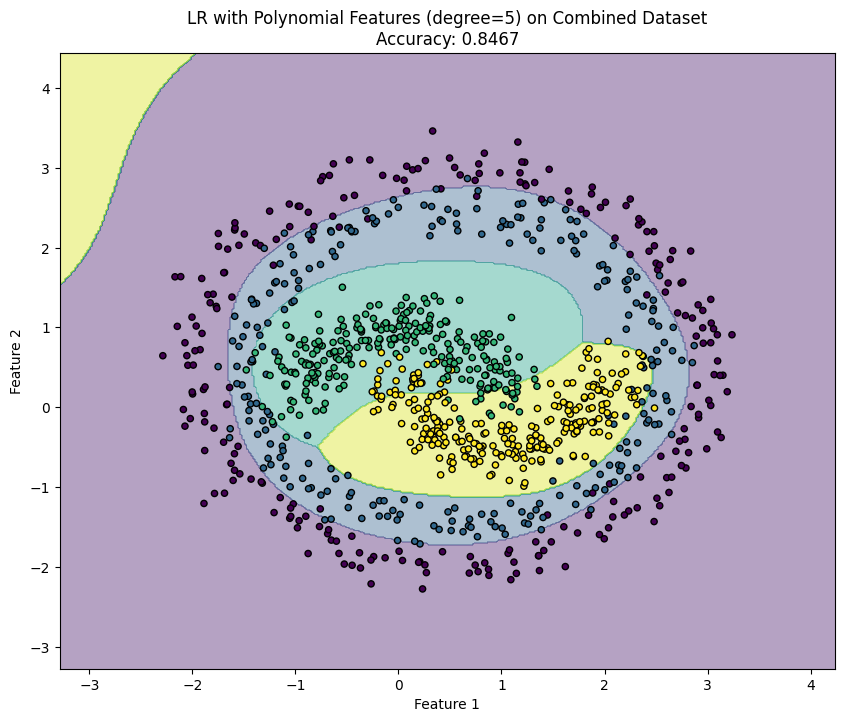

In [ ]:
plt.figure(figsize=(8, 8))
plot_poly_decision_regions(points, labels, poly_features_combined, lr_poly_combined)
plt.title(f"LR with Polynomial Features (degree=5) on Combined Dataset\nAccuracy: {accuracy_score(y_test, y_pred_poly_combined):.4f}", fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

RBF SVM demonstrates superior performance with 91% accuracy
Polynomial SVM struggles significantly 51% accuracy with inappropriate linear lke  boundaries
Logistic Regression with degree-5 polynomial features performs reasonably well

# So The results clearly show that RBF kernel is the optimal choice for these datasets